In [4]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


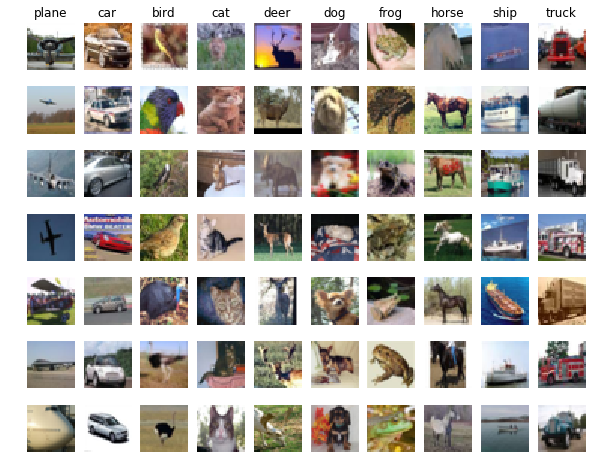

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = num_classes * i + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx, :].astype(np.uint8))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [7]:
num_training = 49000
num_val = 1000
num_test = 1000
num_dev = 500

mask = np.arange(num_training, num_training + num_val)
X_val = X_train[mask]
y_val = y_train[mask]

mask = np.arange(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = np.arange(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [8]:
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Dev data shape: ', X_dev.shape)
print('Dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)
Dev data shape:  (500, 32, 32, 3)
Dev labels shape:  (500,)


In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


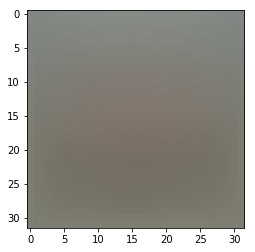

In [10]:
mean_img = np.mean(X_train, axis=0)
print(mean_img[:10])
plt.figure(figsize=(4, 4))
plt.imshow(mean_img.reshape((32,32,3)).astype(np.uint8))
plt.show()

In [11]:
X_train -= mean_img
X_val -= mean_img
X_test -= mean_img
X_dev -= mean_img

In [12]:
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
X_dev = np.hstack((X_dev, np.ones((X_dev.shape[0], 1))))

In [13]:
from cs231n.classifiers.linear_svm import svm_loss_naive
import time

In [14]:
W = np.random.randn(3073, 10) * 0.0001
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.847795


此处reg设置为0的话，loss应该为 C-1=9 左右；reg不为0时，loss应该增加

In [15]:
from cs231n.gradient_check import grad_check_sparse

In [16]:
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -10.910358 analytic: -10.910358, relative error: 1.658690e-11
numerical: -23.736410 analytic: -23.736410, relative error: 2.562711e-12
numerical: 22.515947 analytic: 22.515947, relative error: 1.673666e-11
numerical: 12.843544 analytic: 12.843544, relative error: 4.825281e-11
numerical: -16.403682 analytic: -16.403682, relative error: 3.113807e-11
numerical: 18.806468 analytic: 18.806468, relative error: 5.477194e-11
numerical: 4.325096 analytic: 4.325096, relative error: 5.705306e-11
numerical: 7.107053 analytic: 7.107053, relative error: 4.242111e-11
numerical: -16.975221 analytic: -16.975221, relative error: 8.853833e-12
numerical: -14.407127 analytic: -14.407127, relative error: 2.150523e-11


In [17]:
from cs231n.classifiers.linear_svm import svm_loss_vectorized

In [18]:
loss_naive, grad_naive = svm_loss_vectorized(W, X_dev, y_dev, 0)
print('loss: %f' % (loss_naive, ))

loss: 9.847795


In [19]:
f = lambda w: svm_loss_vectorized(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 32.391656 analytic: 32.391656, relative error: 4.188347e-12
numerical: 3.557740 analytic: 3.557740, relative error: 8.602711e-11
numerical: -14.485462 analytic: -14.485462, relative error: 3.428069e-11
numerical: -5.217195 analytic: -5.217195, relative error: 1.862219e-11
numerical: 8.909938 analytic: 8.909938, relative error: 1.222162e-10
numerical: -13.981488 analytic: -13.981488, relative error: 1.665138e-11
numerical: -7.972197 analytic: -7.972197, relative error: 8.434094e-11
numerical: -16.757386 analytic: -16.757386, relative error: 2.460066e-11
numerical: -14.287764 analytic: -14.287764, relative error: 1.942991e-11
numerical: 44.371944 analytic: 44.371944, relative error: 9.520087e-12


In [20]:
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0)
toc = time.time()
print('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))
print('difference: %f' % (loss_naive - loss_vectorized))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss: 9.847795e+00 computed in 0.103607s
Vectorized loss: 9.847795e+00 computed in 0.006522s
difference: 0.000000
difference: 0.000000


In [21]:
from cs231n.classifiers import LinearSVM

In [27]:
svm = LinearSVM()
tic = time.time()
loss_his = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4, num_iters=1500, batch_size=200, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 788.093623
iteration 100 / 1500: loss 285.657046
iteration 200 / 1500: loss 107.110271
iteration 300 / 1500: loss 41.990717
iteration 400 / 1500: loss 18.909982
iteration 500 / 1500: loss 10.477302
iteration 600 / 1500: loss 6.867575
iteration 700 / 1500: loss 6.266005
iteration 800 / 1500: loss 5.949898
iteration 900 / 1500: loss 5.536191
iteration 1000 / 1500: loss 5.754913
iteration 1100 / 1500: loss 5.587355
iteration 1200 / 1500: loss 5.341886
iteration 1300 / 1500: loss 5.096726
iteration 1400 / 1500: loss 5.279678
That took 6.990965s


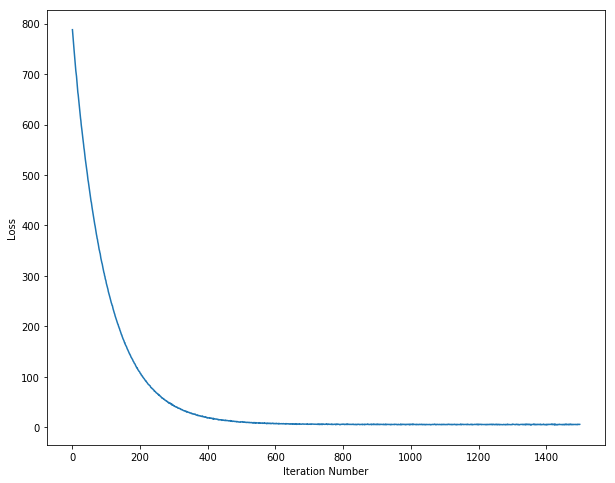

In [29]:
plt.plot(loss_his)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.show()

In [31]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred)))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.373286
validation accuracy: 0.380000


In [34]:
learning_range = [1e-7, 5e-5]
regularization_range = [2.5e4, 5e4]

results = {}
best_val = -1
best_svm = None

num_iter = 1500
learning_rates = np.linspace(learning_range[0], learning_range[1], 5)
regularization_rates = np.linspace(regularization_range[0], regularization_range[1], 5)

for lr in learning_rates:
    for reg in regularization_rates:
        svm = LinearSVM()
        loss_his = svm.train(X_train, y_train, learning_rate=lr, reg=reg, num_iters=num_iter, batch_size=200, verbose=False)
        
        y_train_pred = svm.predict(X_train)
        train_acc = np.mean(y_train_pred==y_train)
        
        y_val_pred = svm.predict(X_val)
        val_acc = np.mean(y_val_pred==y_val)
        
        results[(lr, reg)] = (train_acc, val_acc)
        
        if val_acc > best_val:
            best_val = val_acc
            best_svm = svm

for (lr, reg) in sorted(results):
    (train_acc, val_acc) = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_acc, val_acc))
        
print('best validation accuracy achieved during cross-validation: %f' % best_val)        

/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/linear_svm.py:47: RuntimeWarning: overflow encountered in double_scalars
  dW = X.T.dot(dScore)
/home/lzhang/anaconda3/envs/cs231n/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/linear_svm.py:47: RuntimeWarning: overflow encountered in multiply
  dW = X.T.dot(dScore)
/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/linear_svm.py:41: RuntimeWarning: overflow encountered in subtract
  correct_score = scores[np.arange(N), y]
/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/linear_svm.py:48: RuntimeWarning: overflow encountered in multiply
  loss = np.sum(scores) / N + reg * np.sum(W * W)
/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/linear_svm.py:41: 

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.371245 val accuracy: 0.380000
lr 1.000000e-07 reg 3.125000e+04 train accuracy: 0.366776 val accuracy: 0.384000
lr 1.000000e-07 reg 3.750000e+04 train accuracy: 0.362429 val accuracy: 0.370000
lr 1.000000e-07 reg 4.375000e+04 train accuracy: 0.358204 val accuracy: 0.384000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.364265 val accuracy: 0.376000
lr 1.257500e-05 reg 2.500000e+04 train accuracy: 0.166939 val accuracy: 0.206000
lr 1.257500e-05 reg 3.125000e+04 train accuracy: 0.172816 val accuracy: 0.142000
lr 1.257500e-05 reg 3.750000e+04 train accuracy: 0.184796 val accuracy: 0.185000
lr 1.257500e-05 reg 4.375000e+04 train accuracy: 0.140714 val accuracy: 0.125000
lr 1.257500e-05 reg 5.000000e+04 train accuracy: 0.131612 val accuracy: 0.120000
lr 2.505000e-05 reg 2.500000e+04 train accuracy: 0.147755 val accuracy: 0.141000
lr 2.505000e-05 reg 3.125000e+04 train accuracy: 0.131714 val accuracy: 0.116000
lr 2.505000e-05 reg 3.750000

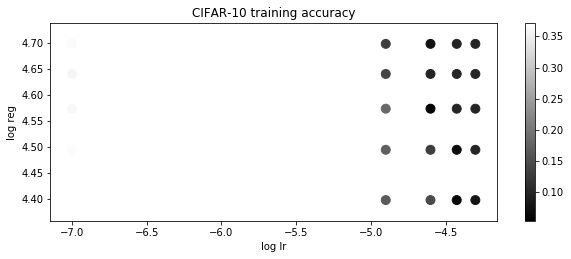

In [36]:
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

marker_size = 80
colors = [results[x][0] for x in results]
plt.subplot(2,1,1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log lr')
plt.ylabel('log reg')
plt.title('CIFAR-10 training accuracy')
plt.show()

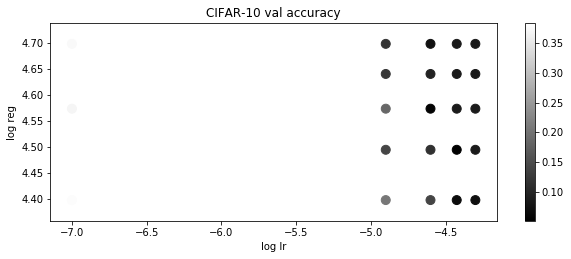

In [37]:
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

marker_size = 80
colors = [results[x][1] for x in results]
plt.subplot(2,1,1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log lr')
plt.ylabel('log reg')
plt.title('CIFAR-10 val accuracy')
plt.show()

In [38]:
y_test_pred = best_svm.predict(X_test)
test_acc = np.mean(y_test_pred==y_test)
print('linear SVM on raw pixels final test set accuracy: %f' % test_acc)

linear SVM on raw pixels final test set accuracy: 0.366000


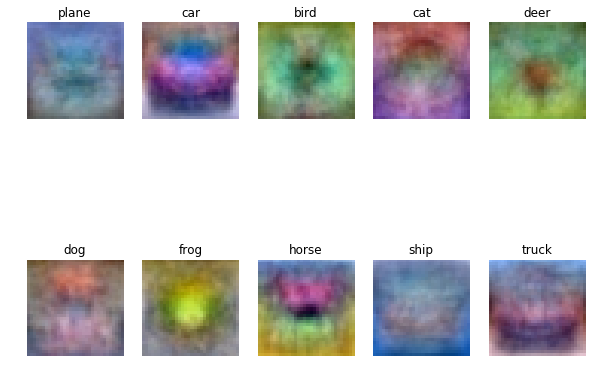

In [43]:
w = best_svm.W[:-1, :]
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for idx, cls in enumerate(classes):
    plt.subplot(2, 5, idx+1)
    w_img = 255.0 * (w[:, :,  :, idx].squeeze() - w_min)/(w_max - w_min)

    plt.imshow(w_img.astype(np.uint8))
    plt.axis('off')
    plt.title(cls)    